<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset
dataframe = pandas.read_csv(r'D:\red_wire_project\Patient_1.csv', usecols=[2], engine='python')
#dataset = dataframe.values
dataset = dataframe.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:][:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1608 793


In [6]:
train.shape

(1608, 1)

In [7]:
train = train[np.logical_not(np.isnan(train))]
train.shape

(1604,)

In [8]:
test = test[np.logical_not(np.isnan(test))]

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1602/1602 - 2s - loss: 0.0148
Epoch 2/100
1602/1602 - 2s - loss: 0.0011
Epoch 3/100
1602/1602 - 2s - loss: 3.8143e-04
Epoch 4/100
1602/1602 - 2s - loss: 3.6232e-04
Epoch 5/100
1602/1602 - 2s - loss: 3.7627e-04
Epoch 6/100
1602/1602 - 2s - loss: 3.7020e-04
Epoch 7/100
1602/1602 - 1s - loss: 3.7062e-04
Epoch 8/100
1602/1602 - 2s - loss: 3.6753e-04
Epoch 9/100
1602/1602 - 2s - loss: 3.7161e-04
Epoch 10/100
1602/1602 - 2s - loss: 3.7080e-04
Epoch 11/100
1602/1602 - 2s - loss: 3.6959e-04
Epoch 12/100
1602/1602 - 2s - loss: 3.7193e-04
Epoch 13/100
1602/1602 - 2s - loss: 3.7298e-04
Epoch 14/100
1602/1602 - 2s - loss: 3.6312e-04
Epoch 15/100
1602/1602 - 2s - loss: 3.7245e-04
Epoch 16/100
1602/1602 - 2s - loss: 3.7113e-04
Epoch 17/100
1602/1602 - 1s - loss: 3.6720e-04
Epoch 18/100
1602/1602 - 2s - loss: 3.7142e-04
Epoch 19/100
1602/1602 - 2s - loss: 3.7114e-04
Epoch 20/100
1602/1602 - 2s - loss: 3.7199e-04
Epoch 21/100
1602/1602 - 2s - loss: 3.6519e-04
Epoch 22/100
1602/1602 - 1s - 

In [ ]:
#trainX = trainX.reshape(-1 , 1)
#trainY = trainY.reshape(-1, 1)

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.57 RMSE
Test Score: 4.59 RMSE


In [ ]:
trainPredict.shape

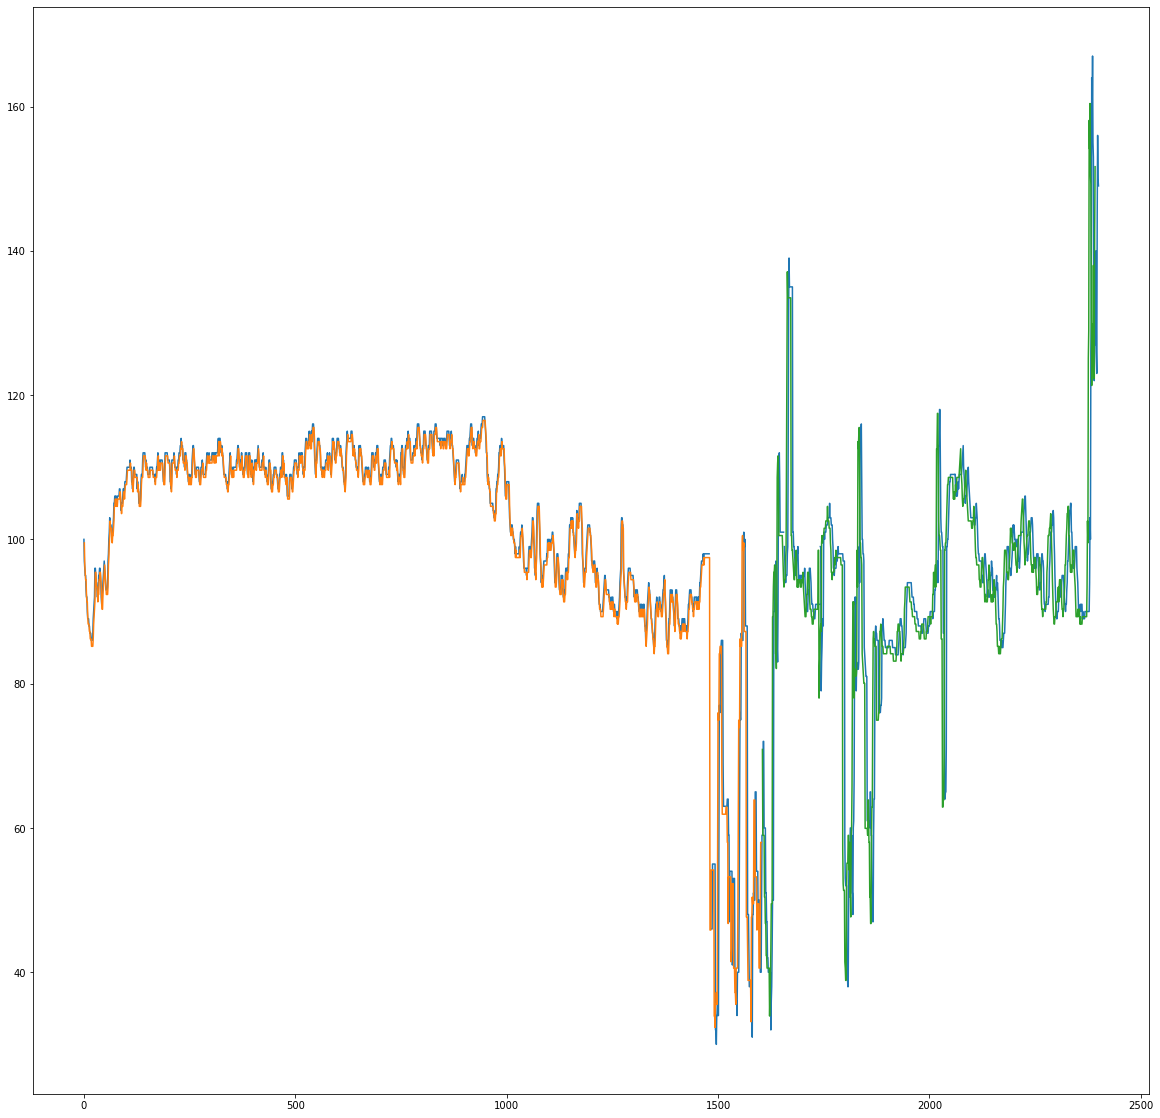

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan

trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-8] = testPredict
# plot baseline and predictions
plt.figure(figsize= (20,20))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()